# 11-1 
# CNN basic

In [2]:
# 이미지 벡터에 필터로 추출되어 여러번 움직이며 convolution
# convolution한 값들을 subsampling

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


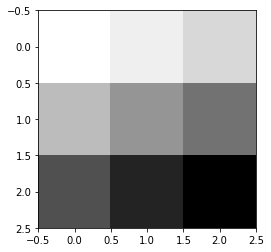

In [8]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3),cmap = 'Greys') # 이미지쇼를 활용해서 시각화 

### image : 1,3,3,1 image, Filter : 2,2,1,1, Stride : 1 * 1, padding : VALID 

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


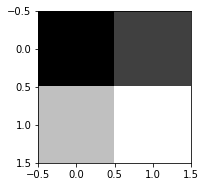

In [9]:
# print("imag:\n", image)

print("image.shape",image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                       [[[1.]],[[1.]]]])
print("weight.shape",weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1],padding='VALID')  # 이 함수 쓰면 자동적으로 계산되는 놀라운 함수 
conv2d_img = conv2d.eval() # 값을 뽑기 위해 eval 함수 사용 
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)  
# enumerate 함수 : 리스트가 있는 경우 순서와 리스트의 값을 전달하는 기능
#이 함수는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴.
#보통 enumerate 함수는 for문과 함께 자주 사용됨 
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

## padding : SAME 
- 필터 사이즈를 뭐로 하든 간에 stride 1*1 기준일때 convolution해서 나오는 값은 원래 이미지와 크기 같게 해주겠다 
- 그럼 부족한 부분에 0을 채워서 계산하게 함으로서 원래 이미지와 같게 해주는 것 

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


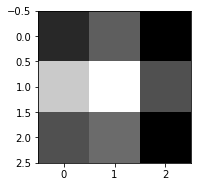

In [12]:
# print("imag:\n", image)

print("image.shape",image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                       [[[1.]],[[1.]]]])
print("weight.shape",weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1],padding='SAME')  # 이 함수 쓰면 자동적으로 계산되는 놀라운 함수 
conv2d_img = conv2d.eval() # 값을 뽑기 위해 eval 함수 사용 
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)  
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3 filters(2,2,1,3) # 마지막 3이 필터의 개수 

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


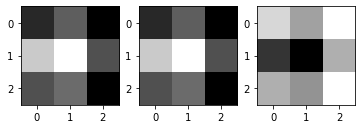

In [14]:
# print("imag:\n", image)

print("image.shape",image.shape)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape",weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1],padding='SAME')  # 이 함수 쓰면 자동적으로 계산되는 놀라운 함수 
conv2d_img = conv2d.eval() # 값을 뽑기 위해 eval 함수 사용 
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)  
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
# 필터 3개 쓰면 세장의 이미지가 나온다 ! -> 필터를 몇 개 쓰냐에 따라 하나의 이미지에서 여러개의 이미지를 뽑아낼 수 있다 

## Max pooling

In [15]:
image = np.array([[[[4],[3]],
                   [[2],[1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1,2,2,1],   # 커널 사이즈 
                     strides = [1,1,1,1],padding = 'SAME')  # padding same = > 입력과 출력 사이즈가 같다. 
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## 실전 이미지에 넣어서 동작해보기 
## MNIST image loading

In [2]:
#데이터 읽어오기 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


- print("훈련 이미지 :",  mnist.train.images.shape)
- print("훈련 라벨:",  mnist.train.labels.shape)
- print("테스트 이미지 : ", mnist.test.images.shape)
- print("테스트 라벨 : ", mnist.test.labels.shape)
- print("검증 이미지 : ", mnist.validation.images.shape)
- print("검증 라벨 : ", mnist.validation.labels.shape)


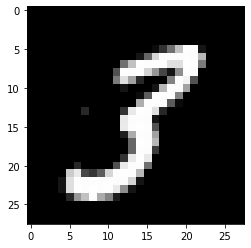

In [26]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

## MNIST Convolution layer
## convolution layer 통과시키기 

Tensor("Conv2D:0", shape=(1, 14, 14, 5), dtype=float32)


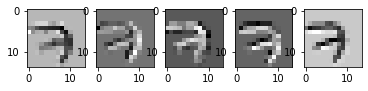

In [4]:
# 세션 선언 
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)  # 28 * 28에 색깔 한개(레이어 1), 여러가지 이미지 있으니까 -1
W1 = tf.Variable(tf.random_normal([3,3,1,5],stddev=0.01)) # 색깔 1개(레이어 크기: 1), 필터 5개 사용 
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1],padding='SAME')  # padding same 인데 stride 2* 2라서 출력은 14 * 14 될듯 
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
# 보기좋게 하기위해서, 행렬의 모양을 바꾸어줌 (축을 변형)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(14,14),cmap='gray')

## MNIST Max pooling

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


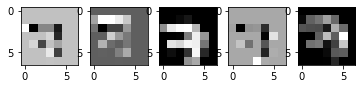

In [5]:
pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1],strides=[
                        1,2,2,1], padding='SAME') # 출력이미지는 7 * 7 될 것 
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(7,7),cmap='gray') #이미지가 subsampling 되어서 해상도가 낮게 나타날 것 

# 11 - 2 
# CNN MNIST : 99% 정확도 !

## conv layer 1


In [6]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

In [7]:
# input placeholders
# input 읽어오기 
X = tf.placeholder(tf.float32,[None,784])
X_img = tf.reshape(X, [-1,28,28,1]) # 이미지 입력으로 넣기 위해 reshape, 28*28의 이미지이고 1개의 색깔을 가지고 있고 n개를 맞추ㅓ봐라. 
Y = tf.placeholder(tf.float32, [None, 10])
# X데이터 같은 경우 이번엔 영상 전체를 통으로 입력하지 않기 때문에 [784] - [28, 28]로 reshape을 적용
# L1 ImgIn shape=(?,28,28,1) 

# 3*3 필터크기, 색깔 1개 필터 32개 사용 
# 첫번째 층에서 [3 x 3] 마스크를 이용해 32개의 층을 뽑아낸다.
W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev = 0.01)) 
#  Conv -> (?,28,28,32)
#  Pool -> (?,14,14,32)
L1 = tf.nn.conv2d(X_img, W1, strides = [1,1,1,1],padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1,2,2,1],
                   strides = [1,2,2,1],padding = 'SAME')

## conv layer 2

In [8]:
# L2 ImgIn shape = (?,14,14,32)

# 64개의 필터를 쓰겠다. 32개는 그대로 내려옴 
#다음 층은 첫번째 32개의 층을 가져와 64개의 층으로 내보낸다.
W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev = 0.01))  
#  Conv -> (?,14,14,64)
#  Pool -> (?,7,7,64)
L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME')
print(L2)
L2 = tf.nn.relu(L2)
print(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print(L2)

# 7*7*64의 크기로 reshape 하겠다 -1의미: n개를 reshape 하겠다. 
# 다음 출력  [7 * 7] 이미지 64개를 flatten하여 옆으로 길게 나열한다.
L2 = tf.reshape(L2, [-1,7*7*64]) 
print(L2)


Tensor("Conv2D_2:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)


## Fully connected layer

In [9]:
# Final FC 7*7*64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7*7*64,10],  # 출력은 10 why? 이건 결과적으로 0~9 안의 숫자를 찍어내는 것이었기 떄문에 
                    initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2,W3) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Training and Evaluation


In [9]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0 
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch): 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y : batch_ys}
        c, _, = sess.run([cost, optimizer],feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:','%04d' % (epoch + 1), 'cost=', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:',sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Learning started. It takes sometime.
Epoch: 0001 cost= 0.372833937
Epoch: 0002 cost= 0.104354822
Epoch: 0003 cost= 0.076842298
Epoch: 0004 cost= 0.059552109
Epoch: 0005 cost= 0.050868921
Epoch: 0006 cost= 0.042163583
Epoch: 0007 cost= 0.036882687
Epoch: 0008 cost= 0.033461333
Epoch: 0009 cost= 0.029055512
Epoch: 0010 cost= 0.026092215
Epoch: 0011 cost= 0.021126330
Epoch: 0012 cost= 0.019972666
Epoch: 0013 cost= 0.017517922
Epoch: 0014 cost= 0.015498780
Epoch: 0015 cost= 0.013973062
Learning Finished!
Accuracy: 0.9878


## Deep CNN


In [10]:
keep_prob = tf.placeholder(tf.float32)

In [11]:
# input placeholders
# input 읽어오기 
X = tf.placeholder(tf.float32,[None,784])
X_img = tf.reshape(X, [-1,28,28,1]) # 이미지 입력으로 넣기 위해 reshape, 28*28의 이미지이고 1개의 색깔을 가지고 있고 n개를 맞추ㅓ봐라. 
Y = tf.placeholder(tf.float32, [None, 10])

In [14]:
# L1 ImgIn shape = (?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01))
#    Conv   -> (?,28,28,32)
#    Pool   -> (?,14,14,32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1],padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1],
                   strides=[1,2,2,1],padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
# L2 ImgIn shape = (?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev = 0.01))
#   Conv   ->  (?,14,14,64)
#   Pool   ->  (?,7,7,64)
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1],padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1],
                   strides=[1,2,2,1],padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [16]:
# L3 ImgIn shape = (?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3,3,64,128],stddev = 0.01))
#   Conv   ->  (?,7,7,128)
#   Pool   ->  (?,4,4,128)
#   Reshape -> (?,4*4*128) # flatten them for FC 
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1],padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1],
                   strides=[1,2,2,1],padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3 = tf.reshape(L3, [-1, 128*4*4])

In [17]:
# L4 FC 4*4*128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128*4*4,625],
initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3,W4)+b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

In [18]:
# L5 Final FC 625 inputs -> 10 puts
W5 = tf.get_variable("W5",shape=[625,10],
initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis  = tf.matmul(L4, W5) + b5

In [20]:
# define cost/loss * optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [21]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [24]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0 
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y : batch_ys, keep_prob : 0.7}
        c, _, = sess.run([cost, optimizer],feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

# Test model and check accuracy 
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Learning started. It takes sometime.
Epoch: 0001 cost = 0.099383145
Epoch: 0002 cost = 0.072244077
Epoch: 0003 cost = 0.060652368
Epoch: 0004 cost = 0.050228829
Epoch: 0005 cost = 0.045682950
Epoch: 0006 cost = 0.040825135
Epoch: 0007 cost = 0.036678789
Epoch: 0008 cost = 0.034663004
Epoch: 0009 cost = 0.034849814
Epoch: 0010 cost = 0.031458163
Epoch: 0011 cost = 0.029072175
Epoch: 0012 cost = 0.029010228
Epoch: 0013 cost = 0.025715018
Epoch: 0014 cost = 0.026439841
Epoch: 0015 cost = 0.024997102
Learning Finished!


In [25]:
def evaluate(X_sample, y_sample, batch_size = 512):
    """Run a minibatch accuracy op"""
    
    N = X_sample.shape[0]
    correct_sample = 0 
    
    for i in range(0,N, batch_size): 
        X_batch = X_sample[i: i + batch_size]
        y_batch = y_sample[i: i + batch_size]
        N_batch = X_batch.shape[0]
        
        feed = {
            X : X_batch,
            Y : y_batch,
            keep_prob : 1
        }
        correct_sample += sess.run(accuracy, feed_dict=feed) * N_batch
    return correct_sample / N
    

In [27]:
print("\nAccuracy Evaluates")
print("-------------------------")
print('Train Accuracy:', evaluate(mnist.train.images, mnist.train.labels))
print('Test Accuracy:', evaluate(mnist.test.images, mnist.test.labels))


Accuracy Evaluates
-------------------------
Train Accuracy: 0.9987090909090909
Test Accuracy: 0.9936999997138977
